# Lecture 3

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib

#Get some functions from external file
current_dir = os.getcwd()
os.chdir(r"C:\Users\sjefs\Desktop\AMAS\Functions")     # Direct to external module
import AMAS_functions as AMAS
importlib.reload(AMAS)
os.chdir(current_dir)

# Mini-Exercise

20
79



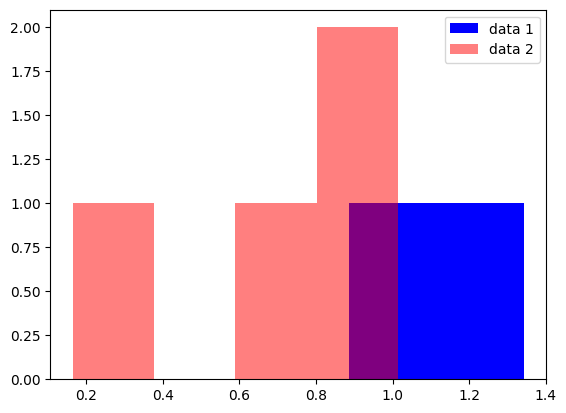

In [ ]:
# Monte carlo gaussian sampler
gaussian = AMAS.gaussian

data_1 = AMAS.MC_sampler(gaussian, interval = [-10, 10], n_points = 4, mu = 1.25, sigma = np.sqrt(0.11))
data_2 = AMAS.MC_sampler(gaussian, interval = [-10, 10], n_points = 4, mu = 1.30, sigma = np.sqrt(0.50))

# Plot the data
plt.hist(data_1, bins=4, alpha=1, color = "blue", label='data 1')
plt.hist(data_2, bins=4, alpha=0.5, color = "red", label='data 2')
plt.legend(loc='upper right')
print("")

# Notes on Likelihoods

For some PDF $f(x, \lambda)$, we define the likelihood:

$\begin{equation} 
L(x_i) = \prod_i f(x_i, \lambda) 
\end{equation}$

Here the $x_i$ are the $i$ datapoints. And $\lambda$ is the parameter('s) of the PDF. 

The value of the likelihood can take any value between $0$ and $\infty$. Example: 
* A very narrow gaussian, will have a very sharp peak, resulting in $f(x_i, \lambda) >> 1$. 
    * High amount of datapoints makes the likelihood prone to overflow
* A very flat gaussian will have values smaller than 1, resulting in $L \rightarrow 0$. 
    * High amount of datapoints makes the likelihood prone to underflow

We often use the log likelihood:     $ \;\;\; ln(L) = \sum_i ln(f(x_i, \lambda)) \; \; \; $ as this becomes a sum of numbers, and we avoid over/underflow. 

$\\~\\$


The likelihood can not be used to say weather a model fits. It can only be used to compare models to see which one fits the best. 
- The one with the largest likelihood fits the best!

Below is an example. 

1.0692733134565047e-112 3.0239821443030717e-33 2.5861270125333777e-46
-257.82255114388596 -74.87873351516532 -104.96875288314044


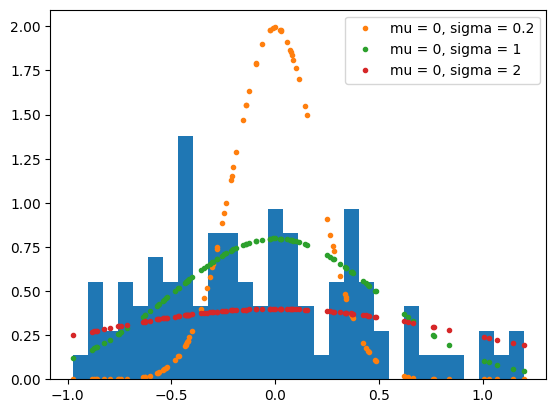

In [140]:
 # We generate normal data and plot it
data = np.random.normal(0, 0.5, 100)                          
plt.hist(data, bins = 30, density = True)

# We plot three different gaussians, with varying sigma parameter
test_0 = AMAS.gaussian(data, mu = 0, sigma = 0.2)
test_1 = AMAS.gaussian(data, mu = 0, sigma = 0.5)
test_2 = AMAS.gaussian(data, mu = 0, sigma = 1)
plt.plot(data, test_0, '.', label = 'mu = 0, sigma = 0.2')
plt.plot(data, test_1, '.', label = 'mu = 0, sigma = 1')
plt.plot(data, test_2, '.', label = 'mu = 0, sigma = 2')
plt.legend()

# We calculate the likelihood of the three gaussians with different sigma
L_0 = AMAS.likelihood(AMAS.gaussian, data, mu = 0, sigma = 0.2)
L_1 = AMAS.likelihood(AMAS.gaussian, data, mu = 0, sigma = 0.5)
L_2 = AMAS.likelihood(AMAS.gaussian, data, mu = 0, sigma = 1)
LL_0 = AMAS.ln_likelihood(AMAS.gaussian, data, mu = 0, sigma = 0.2)
LL_1 = AMAS.ln_likelihood(AMAS.gaussian, data, mu = 0, sigma = 0.5)
LL_2 = AMAS.ln_likelihood(AMAS.gaussian, data, mu = 0, sigma = 1)

print(L_0, L_1, L_2)
print(LL_0, LL_1, LL_2)



From the above example, we note that the gaussian with the right parameters has the largest likelihood value. 

# Exercise 1 likelihood
We will do a Rastor Scan - Seaching for different values of sigma and mu to narrow down on the best LLH. 

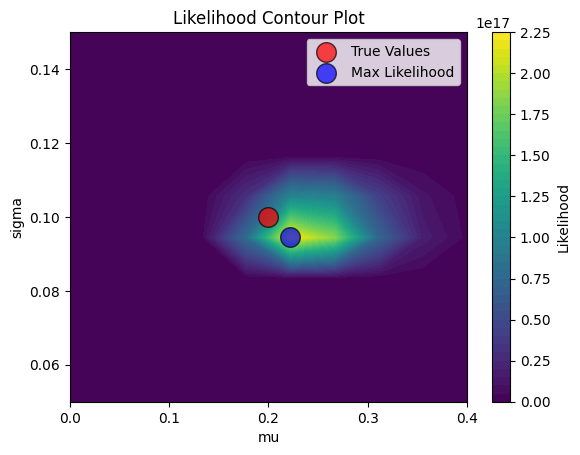

In [ ]:
# Extract the functions and true parameters
mu = 0.2
sigma = 0.1
gaussian = AMAS.gaussian
likelihood = AMAS.likelihood

# We setup the mu's and sigma's we want to examine
mu_test = np.linspace(0, 0.4, 10)
sigma_test = np.linspace(0.05, 0.15, 10)
test_grid = np.meshgrid(mu_test, sigma_test)

# We MC sample 50 points from the gaussian distribution
data = np.random.normal(mu, sigma, 50)

likelihoods = []
for m in mu_test:
    for s in sigma_test:
        likelihoods.append(likelihood(gaussian, data, mu = m, sigma = s))

likelihoods_array = np.array(likelihoods)
likelihoods_matrix = likelihoods_array.reshape(10, 10)
plt.contourf(mu_test, sigma_test, likelihoods_matrix, levels=50, cmap='viridis')
plt.xticks(np.arange(0, 0.5, 0.1))
plt.colorbar(label='Likelihood')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Likelihood Contour Plot')

# plot true mu and sigma values
plt.scatter([mu], [sigma], color='red', alpha = 0.7, s = 200, edgecolors='black', label='True Values')

# Find the indices of the maximum likelihood
max_likelihood_index = np.unravel_index(np.argmax(likelihoods_matrix), likelihoods_matrix.shape)
max_mu = mu_test[max_likelihood_index[1]]
max_sigma = sigma_test[max_likelihood_index[0]]
# Plot the maximum likelihood point
plt.scatter([max_mu], [max_sigma], color='blue', alpha=0.7, s=200, edgecolors='black', label='Max Likelihood')
plt.legend()
plt.show()

# Exercise 1 - Ln likelihood

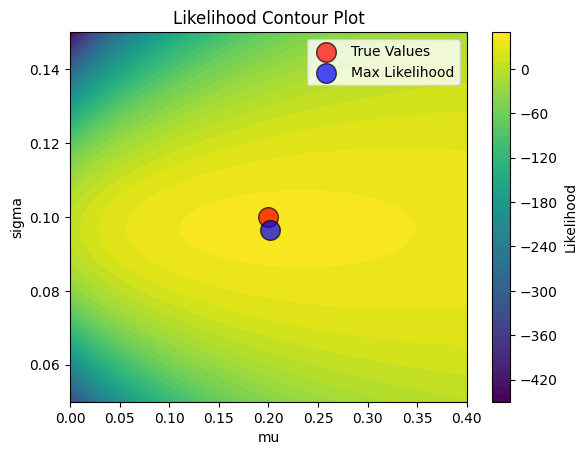

In [461]:
# Extract the functions and true parameters
mu = 0.2
sigma = 0.1
gaussian = AMAS.gaussian
ln_likelihood = AMAS.ln_likelihood

# We setup the mu's and sigma's we want to examine
mu_test = np.linspace(0, 0.4, 100)
sigma_test = np.linspace(0.05, 0.15, 100)
test_grid = np.meshgrid(mu_test, sigma_test)

# We MC sample 50 points from the gaussian distribution
data = np.random.normal(mu, sigma, 50)

ln_likelihoods = []
for m in mu_test:
    for s in sigma_test:
        ln_likelihoods.append(ln_likelihood(gaussian, x = data, mu = m, sigma = s))

ln_likelihoods_array = np.array(ln_likelihoods)
ln_likelihoods_matrix = ln_likelihoods_array.reshape(100, 100)
plt.contourf(mu_test, sigma_test, ln_likelihoods_matrix, levels=50, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.title('Likelihood Contour Plot')

# plot true mu and sigma values
plt.scatter([mu], [sigma], color='red', alpha = 0.7, s = 200, edgecolors='black', label='True Values')

# Find the indices of the maximum likelihood
max_likelihood_index = np.unravel_index(np.argmax(ln_likelihoods_matrix), ln_likelihoods_matrix.shape)
max_mu = mu_test[max_likelihood_index[1]]
max_sigma = sigma_test[max_likelihood_index[0]]
# Plot the maximum likelihood point
plt.scatter([max_mu], [max_sigma], color='blue', alpha=0.7, s=200, edgecolors='black', label='Max Likelihood')
plt.legend()
plt.show()

# Exercise 1 continued

# Exercise 2

In [488]:
import scipy

In [569]:
def func(x, a, b):
    return (1 + a*x + b*x**2)/(2 + 2/3*b)

#func = AMAS.normalizer(func, interval = [-1, 1], a = 0.5, b = 0.5)

# We generate some data
data = AMAS.MC_sampler(func, interval = [-1, 1], n_points = 2000, a = 0.5, b = 0.5)

def neg_ln_likelihood(params, x):
    a, b = params
    model = (1 + a*x + b*x**2)/(2 + 2/3*b)
    return -np.sum(np.log(model))

minimization = scipy.optimize.minimize(neg_ln_likelihood, x0 = [0, 0], args = data,  method = 'Nelder-Mead')
print(minimization.x)
print(minimization.fun)

13
[0.49217167 0.50485833]
1316.3532170762687
